## Старт

Выгрузка данных из csv файла в датафрейм

In [1]:
import pandas as pd
df = pd.read_csv("static/csv/TSLA.csv")
print(df)

      Insider Trading                    Relationship        Date  \
0    Kirkhorn Zachary         Chief Financial Officer  2022-03-06   
1      Taneja Vaibhav        Chief Accounting Officer  2022-03-06   
2    Baglino Andrew D  SVP Powertrain and Energy Eng.  2022-03-06   
3      Taneja Vaibhav        Chief Accounting Officer  2022-03-05   
4    Baglino Andrew D  SVP Powertrain and Energy Eng.  2022-03-05   
..                ...                             ...         ...   
151         Musk Elon                             CEO  2021-11-11   
152         Musk Elon                             CEO  2021-11-11   
153         Musk Elon                             CEO  2021-11-10   
154         Musk Elon                             CEO  2021-11-10   
155         Musk Elon                             CEO  2021-11-10   

         Transaction     Cost   Shares    Value ($) Shares Total  \
0               Sale   196.72   10,455    2,056,775      203,073   
1               Sale   195.79    2,

Диаграмма рассеивания. Взаимосвязь между количеством акций и их стоимостью. По данной диаграмме видно, что чем больше кол-во акций, чем выше стоимость.

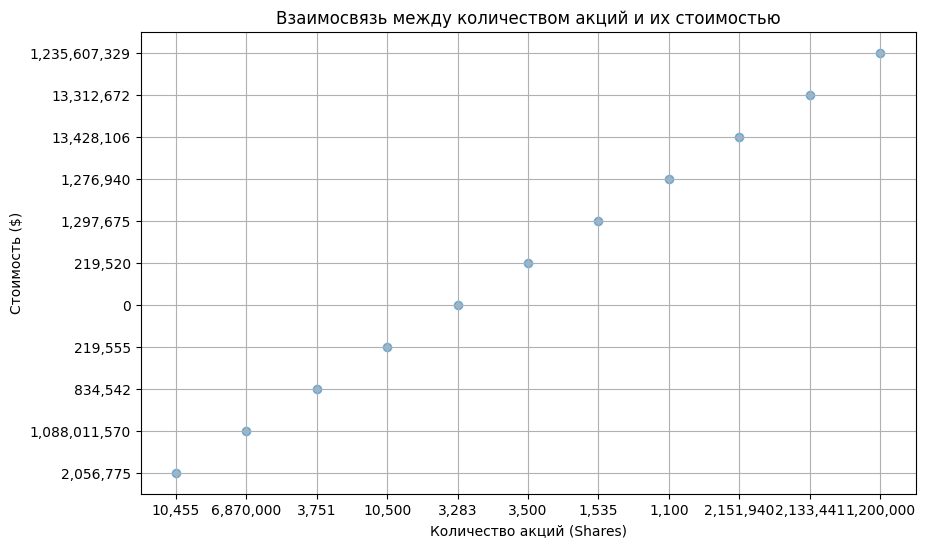

In [2]:
import matplotlib.pyplot as plt

df_reduced = df.iloc[::15]

plt.figure(figsize=(10, 6))
plt.scatter(df_reduced['Shares'], df_reduced['Value ($)'], alpha=0.5)
plt.title('Взаимосвязь между количеством акций и их стоимостью')
plt.xlabel('Количество акций (Shares)')
plt.ylabel('Стоимость ($)')
plt.grid(True)
plt.show()


Объем продаж акций по датам. По этой диаграмме можно сказать, что каждые 2 месяца продажи растут.

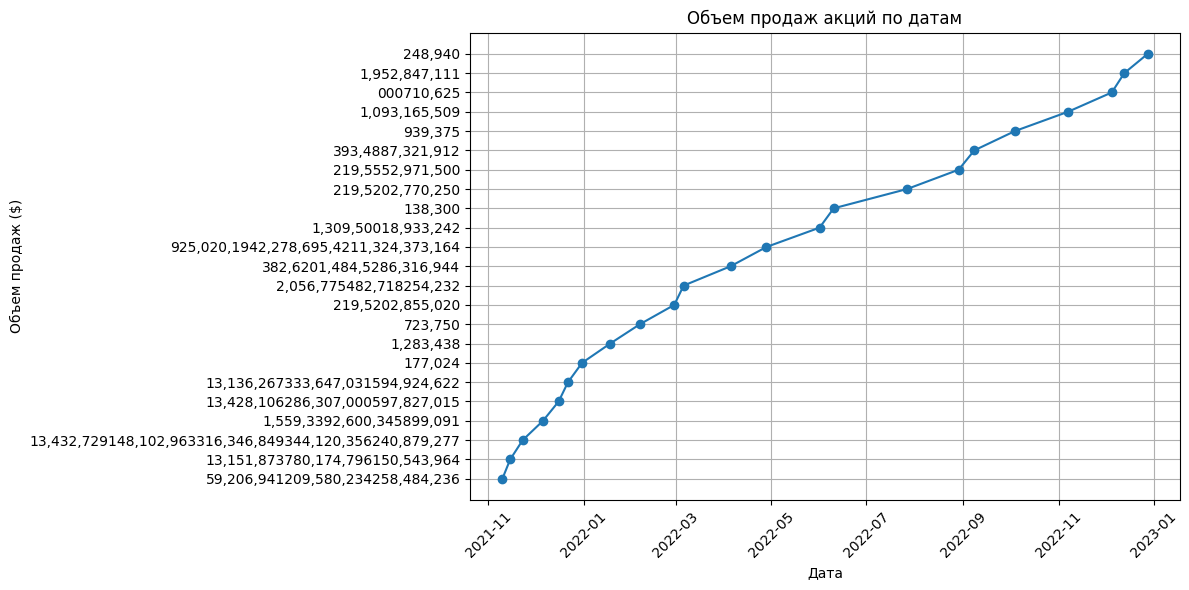

In [11]:
df['Date'] = pd.to_datetime(df['Date'])  # Преобразуем столбец Date в datetime
sales_by_date = df.groupby('Date')['Value ($)'].sum().iloc[::3]

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o')
plt.title('Объем продаж акций по датам')
plt.xlabel('Дата')
plt.ylabel('Объем продаж ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Распределение количества транзакций по должностям. По данной диаграмме понятно, что должность CEO выполняет большее кол-во транзакций.

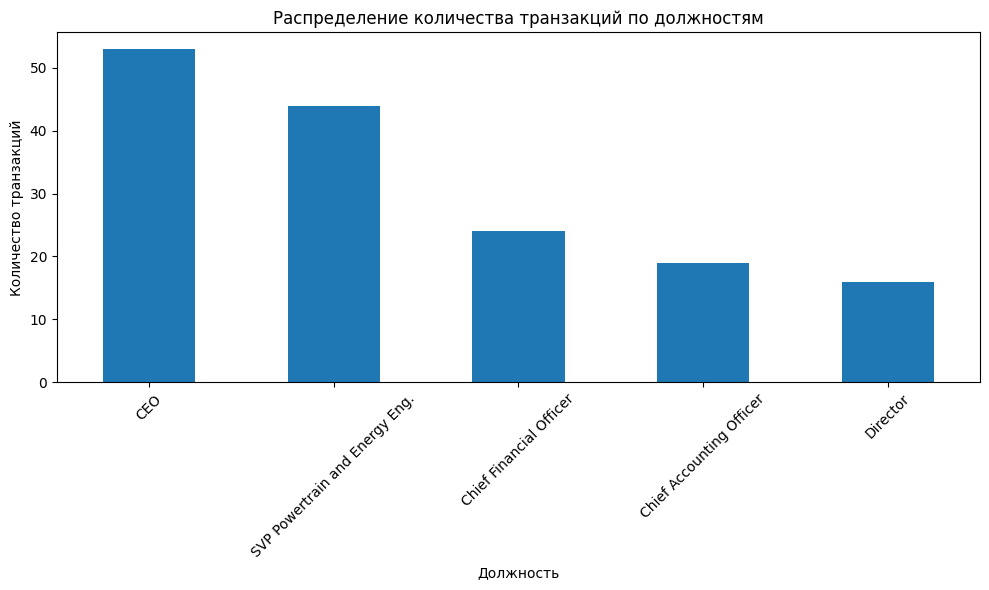

In [21]:
transactions_by_position = df['Relationship'].value_counts()

plt.figure(figsize=(10, 6))
transactions_by_position.plot(kind='bar')
plt.title('Распределение количества транзакций по должностям')
plt.xlabel('Должность')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()